<a href="https://colab.research.google.com/github/florenteb/health_data_countries/blob/master/health_country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Descripción del dataset
##¿ Por qué es importante y qué pregunta/ problema pretende responder?

El objetivo del siguiente trabajo es averiguar si existe relación entre el gasto sanitario por pais y el impacto en número de muertos producidos por el COVID-19.

Para ello nos ayudamos de los datos publicados en kaggle:

* World Bank - World Development Indicators: Health Systems. Downloaded 19/05/2020 from Kaggle Web site - https://www.kaggle.com/danevans/world-bank-wdi-212-health-systems *

* Countries of the World - Country names linked to region, population, area size, GDP, mortality and more - https://www.kaggle.com/fernandol/countries-of-the-world

Y de los datos de incidencia del COVID-19 publicados en Worldometer - https://www.worldometers.info/coronavirus/#countries

Ese fichero final es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:

| Nombre de la columna              	| Descripción                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       	|
|-----------------------------------	|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| Country_Region:                   	| StartFragmentthe region as used in Kaggle Covid-19 spread data challenges.                                                                                                                                                                                                                                                                                                                                                                                                                        	|
| Province_State:                   	| StartFragmentthe region as used in Kaggle Covid-19 spread data challenges.                                                                                                                                                                                                                                                                                                                                                                                                                        	|
| WorldBankName                     	| the name of the country used by the World Bank                                                                                                                                                                                                                                                                                                                                                                                                                                                    	|
| HealthexppctGDP2016               	| Level of current health expenditure expressed as a percentage of GDP. <br> Estimates of current health expenditures include healthcare goods and services consumed during each year. <br> This indicator does not include capital health expenditures such as buildings, machinery, <br> IT and stocks of vaccines for emergency or outbreaks.<br>                                                                                                                                                	|
| Healthexppublicpct2016:           	| Share of current health expenditures funded from domestic public sources for health. <br> Domestic public sources include domestic revenue as internal transfers and grants, transfers, <br>  subsidies to voluntary health insurance beneficiaries, non-profit institutions serving households (NPISH) or <br>  enterprise financing schemes as well as compulsory prepayment and social health insurance contributions. <br> They do not include external resources spent by governments on health. 	|
| Healthexpoutofpocketpct2016:      	| Share of out-of-pocket payments of total current health expenditures. <br> Out-of-pocket payments are spending on health directly out-of-pocket by households.                                                                                                                                                                                                                                                                                                                                    	|
| HealthexppercapitaUSD_2016:       	| Current expenditures on health per capita in current US dollars. <br> Estimates of current health expenditures include healthcare goods and services consumed during each year.                                                                                                                                                                                                                                                                                                                   	|
| percapitaexpPPP2016:              	| Current expenditures on health per capita expressed in international dollars at purchasing power parity (PPP).                                                                                                                                                                                                                                                                                                                                                                                    	|
| Externalhealthexppct2016:         	| Share of current health expenditures funded from external sources. <be> External sources compose of direct foreign transfers and foreign transfers distributed by government <br>   encompassing all financial inflows into the national health system from outside the country. <br> External sources either flow through the government scheme or are channeled through non-governmental organizations or other schemes.                                                                        	|
| Physiciansper1000_2009-18         	| Physicians include generalist and specialist medical practitioners.                                                                                                                                                                                                                                                                                                                                                                                                                               	|
| Nursemidwifeper10002009-18:       	| Nurses and midwives include professional nurses, professional midwives, auxiliary nurses, auxiliary midwives, <br>   enrolled nurses, enrolled midwives and other associated personnel, such as dental nurses and primary care nurses.                                                                                                                                                                                                                                                            	|
| Specialistsurgicalper10002008-18: 	| Specialist surgical workforce is the number of specialist surgical, anaesthetic, and obstetric (SAO) <br>   providers who are working in each country per 100,000 population.                                                                                                                                                                                                                                                                                                                     	|
| Completenessofbirthreg2009-18:    	| Completeness of birth registration is the percentage of children under age 5 whose births were registered at the time of the survey. <br> The numerator of completeness of birth registration includes children whose birth certificate was seen by the interviewer or <br>   whose mother or caretaker says the birth has been registered.                                                                                                                                                       	|
| Completenessofdeathreg2008-16:    	| Completeness of death registration is the estimated percentage of deaths that are registered with their cause of death information <br>   in the vital registration system of a country.                                                                                                                                                                                                                                                                                                          	|

## Entorno


### Abrir un nuevo colab con el kernel de R
    Es un workaround, ya que colab no incluye todavía el kernel de r por defecto.
    https://colab.research.google.com/notebook#create=true&language=r


### Carga de librerías

In [33]:

comprobar_paquete <- function(nombre_paquete){
    if (nombre_paquete %in% installed.packages() ) {
        print(paste0('Paquete ',nombre_paquete,' ya instalado.'))
        print('')
        #return(TRUE)
    }else{
        install.packages(nombre_paquete)
        library(nombre_paquete)
        print('')
        #return(FALSE)
    }
}
comprobar_paquete("ggplot2")

[1] "Paquete ggplot2 ya instalado."


In [59]:
install.packages("fuzzyjoin")
require(fuzzyjoin)
install.packages("zoo")
require(zoo)
install.packages("GGally")
require(GGally)
install.packages("class")
require(class)
install.packages("gridExtra")
require(gridExtra)
install.packages("VIM")
require(VIM)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘stringdist’, ‘geosphere’


Loading required package: fuzzyjoin

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape’


Loading required package: GGally

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: class

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: gridExtra

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencie

# 2. Integración y selección de los datos de interés a analizar


## Creación del fichero CSV

### Carga de ficheros y limpieza

In [0]:
# Cargamos los datos de salud
health_data<-read.csv("./2.12_Health_systems.csv",header=T,sep=",", stringsAsFactors=FALSE)

# Cargamos la información general
country_data<-read.csv("./countries.csv",header=T,sep=",", stringsAsFactors=FALSE)

# Añadimos los datos del covid de https://www.worldometers.info/coronavirus/#countries
covid_data<-read.csv("./worldometers_covid_20200524.csv",header=T,sep=";", stringsAsFactors=FALSE)

# Eliminamos los espacios en blanco que contiene el atributo Country de country_data
country_data$Country <- substr(country_data$Country,1,nchar(country_data$Country)-1)

# Eliminamos las comas separadoras de millares de los campos numéricos de covid_data
for (n in 2:ncol(covid_data)){ 
      covid_data[,n] <- gsub(",", "", covid_data[,n])
      covid_data[,n] <- as.double(covid_data[,n])
}


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


### Cruce de *health_data* y *country_data*




In [0]:
# Cruzamos health_data y country_data por el campo País 
# (World_Bank_Name y Country) y almacenamos en data
data = merge(x=health_data,y=country_data, 
by.x="World_Bank_Name", by.y="Country", all=TRUE, suffixes=c("h.", "c."))

setdiff(health_data$World_Bank_Name, country_data$Country)
setdiff(country_data$Country, health_data$World_Bank_Name)

# Al cruzar ambos datasets por el país, nos encontramos con que existen nombres
# de países que no cruzan, por lo que vamos a analizarlos

# Almacenamos en h aquellos paises de health_data que no están en country_data
h <- data.frame ("h", setdiff(health_data$World_Bank_Name, country_data$Country))
# Almacenamos en caquellos paises de country_data que no están en health_data
c <- data.frame ("c", setdiff(country_data$Country, health_data$World_Bank_Name))

# Agrupamos en un único dataset df
colnames(h) <- c("s","v")
colnames(c) <- c("s","v")
df_nojoin <- rbind(h,c)
df_nojoin$v <- as.character(df_nojoin$v)

# Vamos a probar si con fuzzy join podemos resolver los cruces pendientes
# Renombramos el atributo ya que el método que vamos a utilizar requiere
# que el nombre sea el mismo en los dos datasets
colnames(health_data)[colnames(health_data) == 'World_Bank_Name'] <- 'Country'

# Realizamos varias pruebas sin éxito: pocos cruces adicionales
# y algunos errores
df_fuzzy <- stringdist_inner_join(h, c,
     by ="v", method="lcs", max_dist=6 )

# Por lo que realizamos el cambio manualmente
country_data$Country[country_data$Country=='Antigua & Barbuda']<-'Antigua and Barbuda'
country_data$Country[country_data$Country=='Bosnia & Herzegovina']<-'Bosnia and Herzegovina'
country_data$Country[country_data$Country=='Brunei']<-'Brunei Darussalam'
country_data$Country[country_data$Country=='Cape Verde']<-'Cabo Verde'
country_data$Country[country_data$Country=='Central African Rep.']<-'Central African Republic'
country_data$Country[country_data$Country=='Jersey']<-'Channel Islands'
country_data$Country[country_data$Country=='Congo, Repub. of the']<-'Congo, Rep.'
country_data$Country[country_data$Country=='Egypt']<-'Egypt, Arab Rep.'
country_data$Country[country_data$Country=='Swaziland']<-'Eswatini'
country_data$Country[country_data$Country=='Hong Kong']<-'Hong Kong SAR, China'
country_data$Country[country_data$Country=='Iran']<-'Iran, Islamic Rep.'
country_data$Country[country_data$Country=='Korea, North']<-'Korea, Dem. People\'s Rep.'
country_data$Country[country_data$Country=='Korea, South']<-'Korea, Rep.'
country_data$Country[country_data$Country=='Kyrgyzstan']<-'Kyrgyz Republic'
country_data$Country[country_data$Country=='Laos']<-'Lao PDR'
country_data$Country[country_data$Country=='Macau']<-'Macao SAR, China'
country_data$Country[country_data$Country=='Micronesia, Fed. St.']<-'Micronesia, Fed. Sts.'
country_data$Country[country_data$Country=='Macedonia']<-'North Macedonia'
country_data$Country[country_data$Country=='N. Mariana Islands']<-'Northern Mariana Islands'
country_data$Country[country_data$Country=='Russia']<-'Russian Federation'
country_data$Country[country_data$Country=='Sao Tome & Principe']<-'Sao Tome and Principe'
country_data$Country[country_data$Country=='Slovakia']<-'Slovak Republic'
country_data$Country[country_data$Country=='Saint Kitts & Nevis']<-'St. Kitts and Nevis'
country_data$Country[country_data$Country=='Saint Lucia']<-'St. Lucia'
country_data$Country[country_data$Country=='Saint Vincent and the Grenadines']<-'St. Vincent and the Grenadines'
country_data$Country[country_data$Country=='Syria']<-'Syrian Arab Republic'
country_data$Country[country_data$Country=='East Timor']<-'Timor-Leste'
country_data$Country[country_data$Country=='Trinidad & Tobago']<-'Trinidad and Tobago'
country_data$Country[country_data$Country=='Turks & Caicos Is']<-'Turks and Caicos Islands'
country_data$Country[country_data$Country=='Venezuela']<-'Venezuela, RB'
country_data$Country[country_data$Country=='Virgin Islands']<-'Virgin Islands (U.S.)'
country_data$Country[country_data$Country=='West Bank']<-'West Bank and Gaza'
country_data$Country[country_data$Country=='Yemen']<-'Yemen, Rep.'

# Ahora sí, realizamos el cruce y éste contendrá prácticamente toda la información
# del dataset country_data (siguen faltando algunos paises).
data = merge(x=health_data,y=country_data, by="Country", all.x=TRUE, suffixes=c("h.", "c."))

# Eliminamos estas dos columnas al ser repetitivas y no aportar información
data <- data[, !(names(data) %in% c("Country_Region", "Province_State"))]

[1] "Antigua and Barbuda"            "Bosnia and Herzegovina"        
 [3] "Brunei Darussalam"              "Cabo Verde"                    
 [5] "Central African Republic"       "Channel Islands"               
 [7] "Hong Kong SAR, China"           "Macao SAR, China"              
 [9] "Congo, Rep."                    "Egypt, Arab Rep."              
[11] "Eswatini"                       "Iran, Islamic Rep."            
[13] "Korea, Dem. People's Rep."      "Korea, Rep."                   
[15] "Kosovo"                         "Kyrgyz Republic"               
[17] "Lao PDR"                        "Micronesia, Fed. Sts."         
[19] "Montenegro"                     "Myanmar"                       
[21] "North Macedonia"                "Northern Mariana Islands"      
[23] "Russian Federation"             "Sao Tome and Principe"         
[25] "Sint Maarten (Dutch part)"      "Slovak Republic"               
[27] "South Sudan"                    "St. Kitts and Nevis"           
[29] "St. Lucia"                      "St. Martin (French part)"      
[31] "St. Vincent and the Grenadines" "Syrian Arab Republic"          
[33] "Timor-Leste"                    "Trinidad and Tobago"           
[35] "Turks and Caicos Islands"       "Venezuela, RB"                 
[37] "Virgin Islands (U.S.)"          "West Bank and Gaza"            
[39] "Yemen, Rep."

[1] "American Samoa"                   "Anguilla"                        
 [3] "Antigua & Barbuda"                "Aruba"                           
 [5] "Bermuda"                          "Bosnia & Herzegovina"            
 [7] "British Virgin Is."               "Brunei"                          
 [9] "Burma"                            "Cape Verde"                      
[11] "Central African Rep."             "Congo, Repub. of the"            
[13] "Cook Islands"                     "East Timor"                      
[15] "Egypt"                            "French Guiana"                   
[17] "Gaza Strip"                       "Gibraltar"                       
[19] "Guadeloupe"                       "Guernsey"                        
[21] "Hong Kong"                        "Iran"                            
[23] "Jersey"                           "Korea, North"                    
[25] "Korea, South"                     "Kyrgyzstan"                      
[27] "Laos"                             "Macau"                           
[29] "Macedonia"                        "Martinique"                      
[31] "Mayotte"                          "Micronesia, Fed. St."            
[33] "Montserrat"                       "Nauru"                           
[35] "Netherlands Antilles"             "N. Mariana Islands"              
[37] "Reunion"                          "Russia"                          
[39] "Saint Helena"                     "Saint Kitts & Nevis"             
[41] "Saint Lucia"                      "St Pierre & Miquelon"            
[43] "Saint Vincent and the Grenadines" "Sao Tome & Principe"             
[45] "Slovakia"                         "Swaziland"                       
[47] "Syria"                            "Taiwan"                          
[49] "Trinidad & Tobago"                "Turks & Caicos Is"               
[51] "Venezuela"                        "Virgin Islands"                  
[53] "Wallis and Futuna"                "West Bank"                       
[55] "Western Sahara"                   "Yemen"

### Cruce de *data* y *covid_data*

In [0]:
# Volvemos a comprobar si existen países que no crucen entre data y covid_data
setdiff(data$Country, covid_data$Country)
setdiff(covid_data$Country, data$Country)

# Almacenamos en h aquellos paises de health_data que no están en country_data
d <- data.frame ("d", setdiff(data$Country, covid_data$Country))
# Almacenamos en caquellos paises de country_data que no están en health_data
c <- data.frame ("c", setdiff(covid_data$Country, data$Country))

# Agrupamos en un único dataset df
colnames(d) <- c("s","v")
colnames(c) <- c("s","v")
df_nojoin <- rbind(d,c)
df_nojoin$v <- as.character(df_nojoin$v)

# Repetimos limpieza de manera manual
covid_data$Country[covid_data$Country=='Bahamas']<-'Bahamas, The'
covid_data$Country[covid_data$Country=='Brunei ']<-'Brunei Darussalam'
covid_data$Country[covid_data$Country=='CAR']<-'Central African Republic'
covid_data$Country[covid_data$Country=='Ivory Coast']<-'Cote d\'Ivoire'
covid_data$Country[covid_data$Country=='Czechia']<-'Czech Republic'
covid_data$Country[covid_data$Country=='Egypt']<-'Egypt, Arab Rep.'
covid_data$Country[covid_data$Country=='Faeroe Islands']<-'Faroe Islands'
covid_data$Country[covid_data$Country=='Gambia']<-'Gambia, The'
covid_data$Country[covid_data$Country=='Hong Kong']<-'Hong Kong SAR, China'
covid_data$Country[covid_data$Country=='Iran']<-'Iran, Islamic Rep.'
covid_data$Country[covid_data$Country=='S. Korea']<-'Korea, Rep.'
covid_data$Country[covid_data$Country=='Kyrgyzstan']<-'Kyrgyz Republic'
covid_data$Country[covid_data$Country=='Laos']<-'Lao PDR'
covid_data$Country[covid_data$Country=='Macao']<-'Macao SAR, China'
covid_data$Country[covid_data$Country=='Russia']<-'Russian Federation'
covid_data$Country[covid_data$Country=='Sint Maarten']<-'Sint Maarten (Dutch part)'
covid_data$Country[covid_data$Country=='Slovakia']<-'Slovak Republic'
covid_data$Country[covid_data$Country=='Saint Kitts and Nevis']<-'St. Kitts and Nevis'
covid_data$Country[covid_data$Country=='Saint Lucia']<-'St. Lucia'
covid_data$Country[covid_data$Country=='Saint Martin']<-'St. Martin (French part)'
covid_data$Country[covid_data$Country=='St. Vincent Grenadines']<-'St. Vincent and the Grenadines'
covid_data$Country[covid_data$Country=='Syria']<-'Syrian Arab Republic'
covid_data$Country[covid_data$Country=='Turks and Caicos']<-'Turks and Caicos Islands'
covid_data$Country[covid_data$Country=='UAE']<-'United Arab Emirates'
covid_data$Country[covid_data$Country=='UK']<-'United Kingdom'
covid_data$Country[covid_data$Country=='USA']<-'United States'
covid_data$Country[covid_data$Country=='Venezuela']<-'Venezuela, RB'
covid_data$Country[covid_data$Country=='British Virgin Islands']<-'Virgin Islands (U.S.)'
covid_data$Country[covid_data$Country=='Yemen']<-'Yemen, Rep.'
covid_data$Country[covid_data$Country=='Congo']<-'Congo, Rep.'
covid_data$Country[covid_data$Country=='DRC']<-'Congo, Dem. Rep.'
covid_data$Country[covid_data$Country=='Palestine']<-'West Bank and Gaza'

# Ahora sí, volvemos a cruzar. Algunos países no dispondrán de información del
# COVID
data = merge(x=data,y=covid_data, by="Country", all.x=TRUE, suffixes=c("d.", "cv."))

[1] "Bahamas, The"                   "Brunei Darussalam"             
 [3] "Central African Republic"       "Congo, Dem. Rep."              
 [5] "Congo, Rep."                    "Cote d'Ivoire"                 
 [7] "Czech Republic"                 "Egypt, Arab Rep."              
 [9] "Faroe Islands"                  "Gambia, The"                   
[11] "Guam"                           "Hong Kong SAR, China"          
[13] "Iran, Islamic Rep."             "Kiribati"                      
[15] "Korea, Dem. People's Rep."      "Korea, Rep."                   
[17] "Kosovo"                         "Kyrgyz Republic"               
[19] "Lao PDR"                        "Macao SAR, China"              
[21] "Marshall Islands"               "Micronesia, Fed. Sts."         
[23] "Northern Mariana Islands"       "Palau"                         
[25] "Puerto Rico"                    "Russian Federation"            
[27] "Samoa"                          "Sint Maarten (Dutch part)"     
[29] "Slovak Republic"                "Solomon Islands"               
[31] "St. Kitts and Nevis"            "St. Lucia"                     
[33] "St. Martin (French part)"       "St. Vincent and the Grenadines"
[35] "Syrian Arab Republic"           "Tonga"                         
[37] "Turkmenistan"                   "Turks and Caicos Islands"      
[39] "Tuvalu"                         "United Arab Emirates"          
[41] "United Kingdom"                 "United States"                 
[43] "Vanuatu"                        "Venezuela, RB"                 
[45] "Virgin Islands (U.S.)"          "West Bank and Gaza"            
[47] "Yemen, Rep."

[1] "USA"                    "Russia"                 "UK"                    
 [4] "Iran"                   "UAE"                    "Egypt"                 
 [7] "S. Korea"               "Czechia"                "Ivory Coast"           
[10] "DRC"                    "Mayotte"                "Slovakia"              
[13] "Kyrgyzstan"             "Hong Kong"              "Venezuela"             
[16] "Diamond Princess"       "CAR"                    "Congo"                 
[19] "Réunion"                "Taiwan"                 "Palestine"             
[22] "French Guiana"          "Yemen"                  "Martinique"            
[25] "Faeroe Islands"         "Guadeloupe"             "Gibraltar"             
[28] "Brunei "                "Bermuda"                "Aruba"                 
[31] "Bahamas"                "Sint Maarten"           "Syria"                 
[34] "Macao"                  "Saint Martin"           "Gambia"                
[37] "Laos"                   "Saint Lucia"            "St. Vincent Grenadines"
[40] "Curaçao"                "Saint Kitts and Nevis"  "Falkland Islands"      
[43] "Turks and Caicos"       "Vatican City"           "Montserrat"            
[46] "MS Zaandam"             "British Virgin Islands" "Caribbean Netherlands" 
[49] "St. Barth"              "Western Sahara"         "Anguilla"              
[52] "Saint Pierre Miquelon"

### Creación del fichero de datos
El siguiente fichero es el resultante del cruce entre los datos de gasto en salud, enriquecido con los indicadores más importantes del pais y la incidencia que el COVID a tenido en esos paises. 

In [0]:
# Escribimos el fichero
write.csv(data, file = "health_country_data.csv")

# 3. Limpieza de los datos

### Carga de datos
Ejecutar la siguiente linea para cargar el fichero resultante de la sección anterior, si es necesario.

In [0]:
health <- read.csv("health_country_data.csv", sep = ",")

Debido a que tenemos un número elevado de variables, antes de aplicar un tratamiento de valores nulos, vamos a ver si podemos hacer una selección de las variables más características.

### Análisis exploratorio


In [4]:
print(paste0("Dimensión del array: ", dim(health)[1], "x", dim(health)[2]))
head(health)
#Vemos que en la dimensión Climate faltan sus levels. 
#  Se ha intentado encontrar en la documentación del dataset sin éxito


[1] "Dimensión del array: 210x41"


,X,Country,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009.18,Nurse_midwife_per_1000_2009.18,⋯,Service,Total.cases,Total,Total.recovered,Active.cases,Serious...Critical,Total.cases...1M.pop,Deaths...1M.pop,Total.tests,Tests...1M.pop
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,1,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,⋯,"0,38",9998,216,104,8742,19,257,6.0,29417,758
2,2,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,⋯,"0,579",989,31,783,175,5,344,11.0,13133,4563
3,3,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,⋯,"0,298",8113,592,4426,3095,22,185,14.0,NA,NA
4,4,Andorra,10.4,49.1,41.7,3834.7,4978.7,NA,3.3,4.0,⋯,,762,51,653,58,3,9864,660.0,375,48542
5,5,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,⋯,"0,246",61,4,18,39,NA,2,0.1,10,305
6,6,Antigua and Barbuda,4.3,60.6,32.2,623.1,976.4,0.0,2.8,3.1,⋯,"0,743",25,3,19,3,1,256,31.0,183,187


In [5]:
# Examinamos la estructura
str(health)

'data.frame':	210 obs. of  41 variables:
 $ X                                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Country                             : Factor w/ 210 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Health_exp_pct_GDP_2016             : num  10.2 6.7 6.6 10.4 2.9 4.3 7.5 9.9 9.3 10.4 ...
 $ Health_exp_public_pct_2016          : num  5.1 41.4 67.7 49.1 44.1 60.6 74.4 16.5 68.3 72.5 ...
 $ Health_exp_out_of_pocket_pct_2016   : num  77.4 58 30.9 41.7 35.2 32.2 15.8 80.6 18.9 18.9 ...
 $ Health_exp_per_capita_USD_2016      : num  57.2 271.5 260.4 3834.7 95.2 ...
 $ per_capita_exp_PPP_2016             : num  163 760 998 4979 186 ...
 $ External_health_exp_pct_2016        : num  17.5 0.7 0 NA 3.6 0 0.6 1.7 0 NA ...
 $ Physicians_per_1000_2009.18         : num  0.3 1.2 1.8 3.3 0.2 2.8 4 2.9 3.6 5.1 ...
 $ Nurse_midwife_per_1000_2009.18      : num  0.3 3.6 2.2 4 1.3 3.1 2.6 5.6 12.7 8.2 ...
 $ Specialist_surgical_per_1000_2008.18: num  0 11.6 12.1 83.1 NA ...
 $ Completene

In [0]:
# Eliminamos la primera columna. Es un numerador de filas
health$X <- NULL

In [0]:
# Tenemos columnas númericas como factor (no categóricas)
#  Necesitamos hacer la transformación en dos pasos:
#     1) Cambiar los "," por el "." o perderemos la parte decimal.
#     2) Convertir las columnas de factor en numéricas, a excepción de la columna Country y Climate
no_col <-function(col_name){
    columns <- c("Country","Region", "Climate")
    for (n in 1:length(columns)) {
        if (col_name == columns[n]) {
            return(TRUE)
            break
        }
    }
    return(FALSE)
}


for (n in 1:ncol(health)){ 
    if (no_col(names(health)[n]) == FALSE) {
        if (is.factor(health[,n])) {
            health[,n] <- gsub(",", ".", health[, n])
            health[,n] <- as.double(health[,n])
        }
    }
}


In [8]:
# Comprovamos la dimensionalidad del dataframe y si todas las variables han sido convertidas con éxito.
dim(health)
str(health)

[1] 210  40

'data.frame':	210 obs. of  40 variables:
 $ Country                             : Factor w/ 210 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Health_exp_pct_GDP_2016             : num  10.2 6.7 6.6 10.4 2.9 4.3 7.5 9.9 9.3 10.4 ...
 $ Health_exp_public_pct_2016          : num  5.1 41.4 67.7 49.1 44.1 60.6 74.4 16.5 68.3 72.5 ...
 $ Health_exp_out_of_pocket_pct_2016   : num  77.4 58 30.9 41.7 35.2 32.2 15.8 80.6 18.9 18.9 ...
 $ Health_exp_per_capita_USD_2016      : num  57.2 271.5 260.4 3834.7 95.2 ...
 $ per_capita_exp_PPP_2016             : num  163 760 998 4979 186 ...
 $ External_health_exp_pct_2016        : num  17.5 0.7 0 NA 3.6 0 0.6 1.7 0 NA ...
 $ Physicians_per_1000_2009.18         : num  0.3 1.2 1.8 3.3 0.2 2.8 4 2.9 3.6 5.1 ...
 $ Nurse_midwife_per_1000_2009.18      : num  0.3 3.6 2.2 4 1.3 3.1 2.6 5.6 12.7 8.2 ...
 $ Specialist_surgical_per_1000_2008.18: num  0 11.6 12.1 83.1 NA ...
 $ Completeness_of_birth_reg_2009.18   : num  42.3 98.4 100 100 25 NA 100 99.3 100 1

In [9]:
# Miramos los NA de las columnas
print(sapply(health, function(x) sum(is.na(x))))

                             Country              Health_exp_pct_GDP_2016 
                                   0                                   24 
          Health_exp_public_pct_2016    Health_exp_out_of_pocket_pct_2016 
                                  24                                   24 
      Health_exp_per_capita_USD_2016              per_capita_exp_PPP_2016 
                                  24                                   24 
        External_health_exp_pct_2016          Physicians_per_1000_2009.18 
                                  43                                   21 
      Nurse_midwife_per_1000_2009.18 Specialist_surgical_per_1000_2008.18 
                                  21                                   35 
   Completeness_of_birth_reg_2009.18    Completeness_of_death_reg_2008.16 
                                  47                                  103 
                              Region                           Population 
                         

### Preselección de variables

Vamos a utilizar una técnica de reducción de la dimensionalidad mediante algoritmo predictivo.

#### Reducción de la dimensionalidad mediante Ridge y Lasso

In [0]:
# Preparación de los datos.
datos <- na.omit(health)
# Sacamos las columnas categóricas: Country, Region y Climate
columnas <- c('Health_exp_pct_GDP_2016','Health_exp_public_pct_2016','Health_exp_out_of_pocket_pct_2016', 
    'Health_exp_per_capita_USD_2016','per_capita_exp_PPP_2016','External_health_exp_pct_2016', 
    'Physicians_per_1000_2009.18','Nurse_midwife_per_1000_2009.18','Specialist_surgical_per_1000_2008.18',
    'Completeness_of_birth_reg_2009.18', 'Completeness_of_death_reg_2008.16','Population',
    'Area..sq..mi..', 'Pop..Density..per.sq..mi..','Coastline..coast.area.ratio.','Net.migration','Infant.mortality..per.1000.births.',
    'GDP....per.capita.','Literacy....','Phones..per.1000.','Arable....','Crops....','Other....',
    'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service', 'Total.cases','Total','Total.recovered',
    'Active.cases','Serious...Critical','Total.cases...1M.pop','Total.tests','Tests...1M.pop')

x <- model.matrix(`Deaths...1M.pop` ~., data=datos)[ , columnas]
y <- datos$`Deaths...1M.pop`

[1] "Paquete glmnet ya instalado."
[1] "RIDGE. Mín. Error lamda: 3170.98891892305"
[1] "RIDGE. Valor óptimo de lamda: 68316.885091009"
37 x 1 sparse Matrix of class "dgCMatrix"
                                                s0
(Intercept)                           6.046551e+01
Health_exp_pct_GDP_2016               3.857263e-02
Health_exp_public_pct_2016            4.737009e-03
Health_exp_out_of_pocket_pct_2016    -4.382955e-03
Health_exp_per_capita_USD_2016        6.044637e-05
per_capita_exp_PPP_2016               6.809449e-05
External_health_exp_pct_2016         -4.213763e-02
Physicians_per_1000_2009.18           1.604829e-02
Nurse_midwife_per_1000_2009.18        2.098208e-02
Specialist_surgical_per_1000_2008.18  1.290674e-03
Completeness_of_birth_reg_2009.18     2.475511e-03
Completeness_of_death_reg_2008.16     2.316179e-03
Population                            1.057357e-09
Area..sq..mi..                        1.575791e-08
Pop..Density..per.sq..mi..            2.326019e-05
Coastli

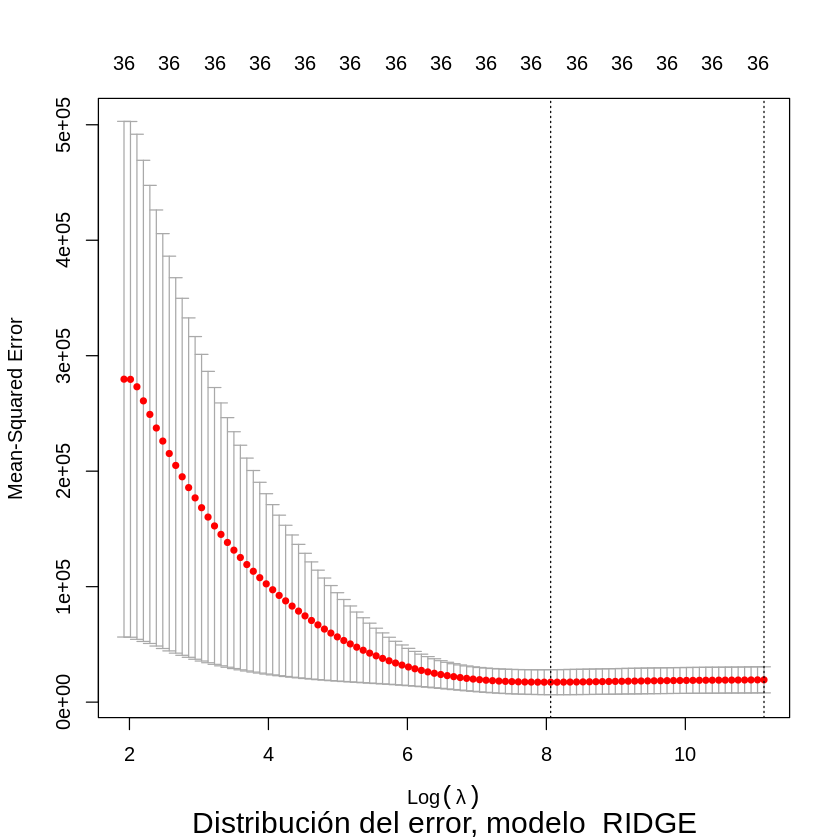

[1] "LASSO. Mín. Error lamda: 68.3168850910089"
[1] "LASSO. Valor óptimo de lamda: 68.3168850910089"
37 x 1 sparse Matrix of class "dgCMatrix"
                                              s0
(Intercept)                          6.27980e+01
Health_exp_pct_GDP_2016              .          
Health_exp_public_pct_2016           .          
Health_exp_out_of_pocket_pct_2016    .          
Health_exp_per_capita_USD_2016       .          
per_capita_exp_PPP_2016              1.54235e-17
External_health_exp_pct_2016         .          
Physicians_per_1000_2009.18          .          
Nurse_midwife_per_1000_2009.18       .          
Specialist_surgical_per_1000_2008.18 .          
Completeness_of_birth_reg_2009.18    .          
Completeness_of_death_reg_2008.16    .          
Population                           .          
Area..sq..mi..                       .          
Pop..Density..per.sq..mi..           .          
Coastline..coast.area.ratio.         .          
Net.migration           

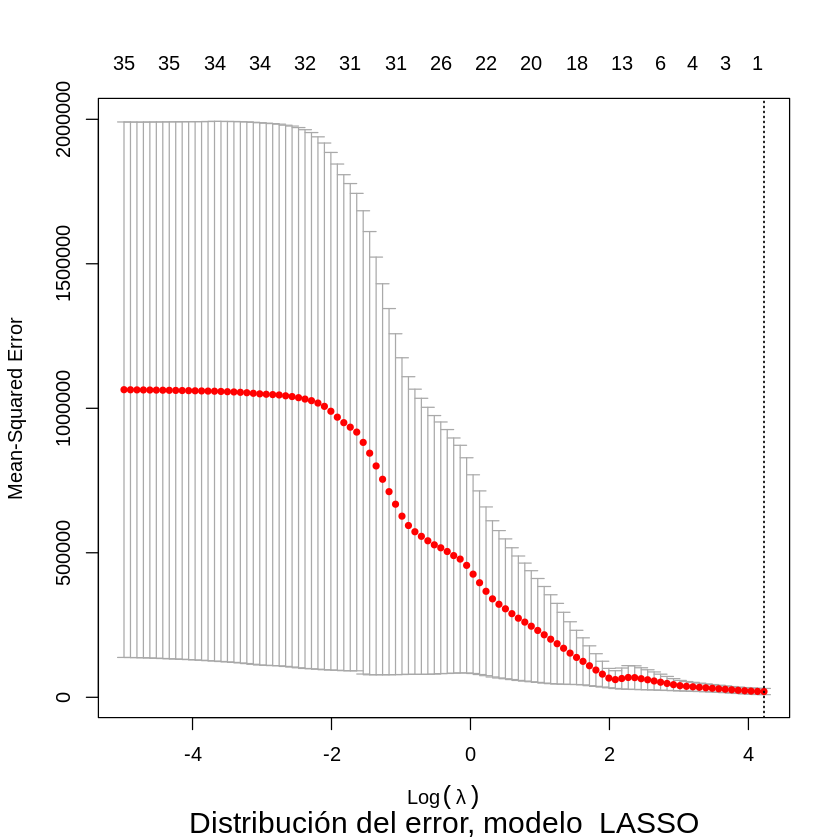

In [50]:
comprobar_paquete("glmnet")

set.seed(12345)

# Calculamos el valor de lambda mediante cross validation, 10 folds.
# MSE es el estimador utilizado para el cálculo del error.

# glmnet: para rigde alpha=0; para lasso alpha=1

reduccion <- function(alpha){
    if (alpha == 0) {
        nombre_modelo='RIDGE'
        #print("Reducción mediante RIDGE")
        #print("========================")
    }
    else {
        nombre_modelo='LASSO'
        #print("Reducción mediante LASSO")
        #print("========================")
    }
    modelo <- cv.glmnet(x, y, alpha=alpha, nfolds = 10, type.measure = "mse")
    main <- paste('Distribución del error, modelo ', nombre_modelo)
    plot(modelo, sub=main,  cex.sub=1.5)

    # Valor lambda con el que se consigue el mínimo test-error
    print(paste0(nombre_modelo, ". Mín. Error lamda: ", modelo$lambda.min))
    # Valor de lambda óptimo. Aquel que está lo más próximo a 1 desv. estándar del mínimo
    print(paste0(nombre_modelo, ". Valor óptimo de lamda: ", modelo$lambda.1se))

    modelo_final <- glmnet(x, y, alpha=alpha, lambda = modelo$lambda.1se )
    return(coef(modelo_final))
}

for (alpha in c(0,1)) {
    print(reduccion(alpha))
}


No se consigue una reducción de la dimensionalidad automática mediante Lasso o Ridge óptima. Ello puede ser debido a la nula correlación que hay entre las variables. Por ello lo más recomendable es utilizar la matriz de correlación para detectar las dimensiones que aportan más información visualmente.

#### Análisis de correlación

Warning message in ggcorr(health, nbreaks = 4, label = FALSE, label_size = 2.5, :
“data in column(s) 'Country', 'Region', 'Climate', 'Total' are not numeric and were ignored”


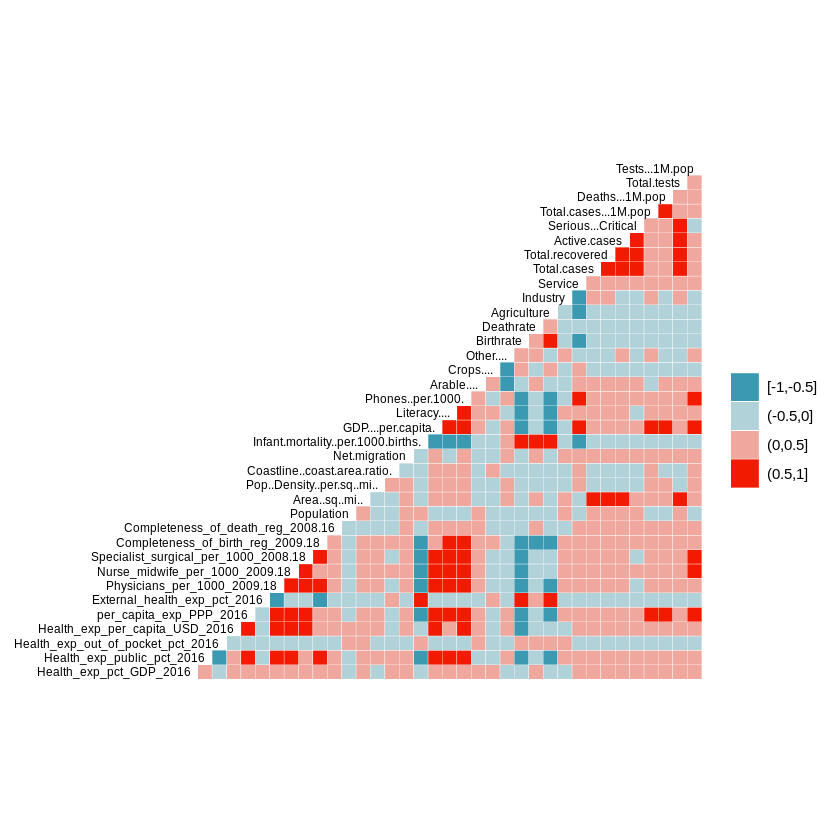

In [0]:
# Correlaciones entre todas las variables
ggcorr(health, nbreaks=4, label=FALSE, label_size=2.5, layout.exp=12, hjust=1, label_round=1, size=2.5)
# No se observa ninguna correlación fuerte entre los datos
# covid y los de los paises, ni siquiera respecto a su sanidad.
# Las única correlación está en el número de tests y el GDP.

De entre todas las variables, se han encontrado las siguientes correlaciones "significativas" entre datos del Covid-19 y el resto de atributos (valores entre 0.5 y 1, ninguna correlación negativa significativa):
* Phones..per.1000.
* GDP....per.capita.
* Area..sq..mi..
* Specialist_surgical_per_1000_2008.18
* Nurse_midwife_per_1000_2009.18
* per_capita_exp_PPP_2016

Por tanto, vamos a definir un subconjunto que contenga la información identificativa (nombre país, región), los atributos anteriores, así como los distintos valores relativos al Covid-19.

### Creación del subset de datos

In [51]:
# Definimos el subset de datos con el que trabajaremos
subsetData <- c("Country", 
"Region", 
"Phones..per.1000.", 
"GDP....per.capita.",
"Area..sq..mi..",
"Specialist_surgical_per_1000_2008.18",
"Nurse_midwife_per_1000_2009.18",
"per_capita_exp_PPP_2016", 		
"Deaths...1M.pop")		
covidData = health[, subsetData]
names(covidData) <- c("Country", "Region",  "Phones_per_1k", "GDP_per_capita", "Area_sqm", 
"Surgical_per_1k", "Nurse_per_1k", "HExp_per_capita", "Deaths_1m")
str(covidData)

'data.frame':	210 obs. of  9 variables:
 $ Country        : Factor w/ 210 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Region         : Factor w/ 11 levels "ASIA (EX. NEAR EAST)         ",..: 1 4 7 11 10 5 5 3 9 11 ...
 $ Phones_per_1k  : num  3.2 71.2 78.1 497.2 7.8 ...
 $ GDP_per_capita : int  700 4500 6000 19000 1900 11000 11200 3500 29000 30000 ...
 $ Area_sqm       : int  647500 28748 2381740 468 1246700 443 2766890 29800 7686850 83870 ...
 $ Surgical_per_1k: num  0 11.6 12.1 83.1 NA ...
 $ Nurse_per_1k   : num  0.3 3.6 2.2 4 1.3 3.1 2.6 5.6 12.7 8.2 ...
 $ HExp_per_capita: num  163 760 998 4979 186 ...
 $ Deaths_1m      : num  6 11 14 660 0.1 31 10 27 4 71 ...


Ahora sí podemos completar los valores NA sobre el subconjunto escogido.

### 3.1. Gestión de elementos vacíos

In [52]:
# Miramos los NA de las columnas
print(sapply(covidData, function(x) sum(is.na(x))))

        Country          Region   Phones_per_1k  GDP_per_capita        Area_sqm 
              0               6               8               6               6 
Surgical_per_1k    Nurse_per_1k HExp_per_capita       Deaths_1m 
             35              21              24              41 


*Region* es un valor informativo complementario, pero podemos asignarlo manualmente en función del país.

*Deaths_1m* son los valores objetivo, por lo que podemos utilizar estos registros vacíos para probar algún algoritmo de predicción.

El resto de valores podemos intentar rellenarlos mediante knn en base a campos relativos al desarrollo del país.



In [0]:
# Buscamos los valores que faltan para completarlos manualmente (region y área)
covidData[which(is.na(covidData$Area_sqm)),]

,Country,Region,Phones_per_1k,GDP_per_capita,Area_sqm,Surgical_per_1k,Nurse_per_1k,HExp_per_capita,Deaths_1m
,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
100,Kosovo,NA,NA,NA,NA,27.7,NA,NA,NA
127,Montenegro,NA,NA,NA,NA,64.1,5.7,1333.9,14.0
130,Myanmar,NA,NA,NA,NA,2.4,1.0,291.1,0.1
166,Sint Maarten (Dutch part),NA,NA,NA,NA,NA,NA,NA,350.0
172,South Sudan,NA,NA,NA,NA,0.3,NA,NA,0.7
177,St. Martin (French part),NA,NA,NA,NA,NA,NA,NA,78.0


In [0]:
# Completamos manualmente los datos de región
covidData$Region[130] <- 'ASIA (EX. NEAR EAST)         '
covidData$Region[172] <- 'SUB-SAHARAN AFRICA                 '
covidData$Region[127] <- 'EASTERN EUROPE                     '
covidData$Region[100] <- 'EASTERN EUROPE                     '
covidData$Region[166] <- 'LATIN AMER. & CARIB    '
covidData$Region[177] <- 'LATIN AMER. & CARIB    '

# Y los datos de superficie
covidData$Area_sqm[100] <- 4203
covidData$Area_sqm[127] <- 5333
covidData$Area_sqm[130] <- 261228
covidData$Area_sqm[166] <- 13
covidData$Area_sqm[172] <- 239285
covidData$Area_sqm[177] <- 20

In [60]:
comprobar_paquete("class")
# Imputamos las variables numéricas en base a la información cercana
imput <- kNN(covidData[,c("Phones_per_1k","GDP_per_capita","Surgical_per_1k","Nurse_per_1k","HExp_per_capita")], k=3)
covidData$Phones_per_1k <- imput$Phones_per_1k
covidData$GDP_per_capita <- imput$GDP_per_capita
covidData$Surgical_per_1k <- imput$Surgical_per_1k
covidData$Nurse_per_1k <- imput$Nurse_per_1k
covidData$HExp_per_capita <- imput$HExp_per_capita

[1] "Paquete class ya instalado."


In [61]:
# Miramos los NA de las columnas
print(sapply(covidData, function(x) sum(is.na(x))))

        Country          Region   Phones_per_1k  GDP_per_capita        Area_sqm 
              0               0               0               0               0 
Surgical_per_1k    Nurse_per_1k HExp_per_capita       Deaths_1m 
              0               0               0              41 


In [0]:
# Separamos en test y train según la existancia o no de Deaths_1m
covidTest <- covidData[is.na(covidData$Deaths_1m),]
covidTrain <- covidData[!is.na(covidData$Deaths_1m),]

### 3.2. Identificación y tratamiento de valores extremos

Vamos a mostrar el diagrama de caja a escala normal y escala exponencial 10, ya que parece que los casos de muertes obedecen a una distribución parecida:

Rango outliers: [ 88 , 1238 ]

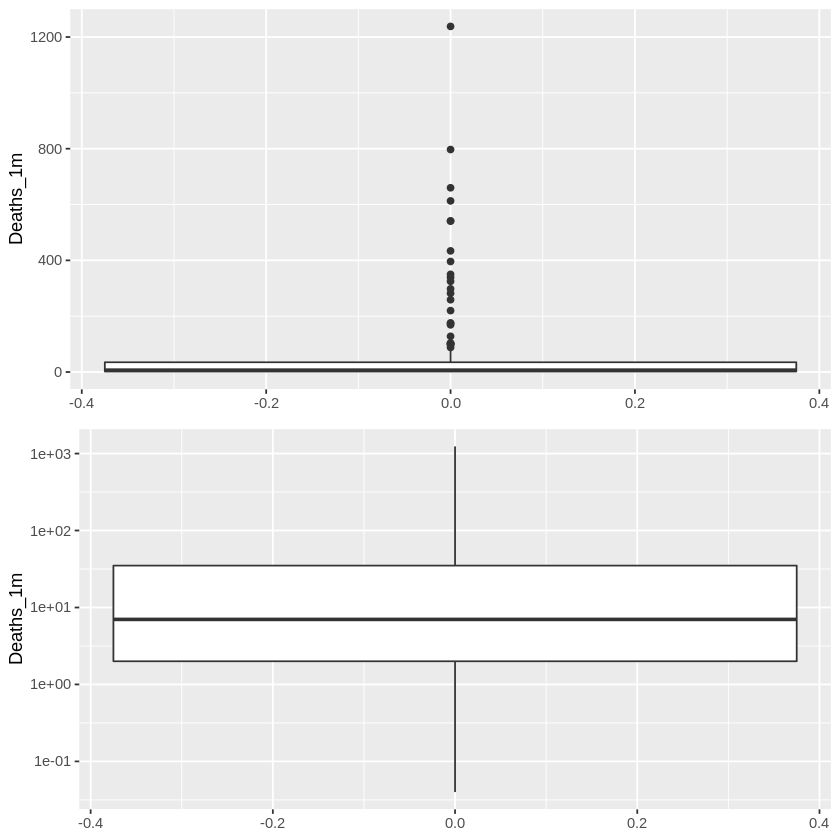

In [0]:
grid.arrange(
  ggplot(data=covidTrain, aes(y=Deaths_1m)) + geom_boxplot(),
  ggplot(data=covidTrain, aes(y=Deaths_1m)) + geom_boxplot() + scale_y_log10(),
  nrow = 2)
outliers <- boxplot.stats(covidTrain$Deaths_1m)$out
cat("Rango outliers: [", min(outliers),",",max(outliers),"]")

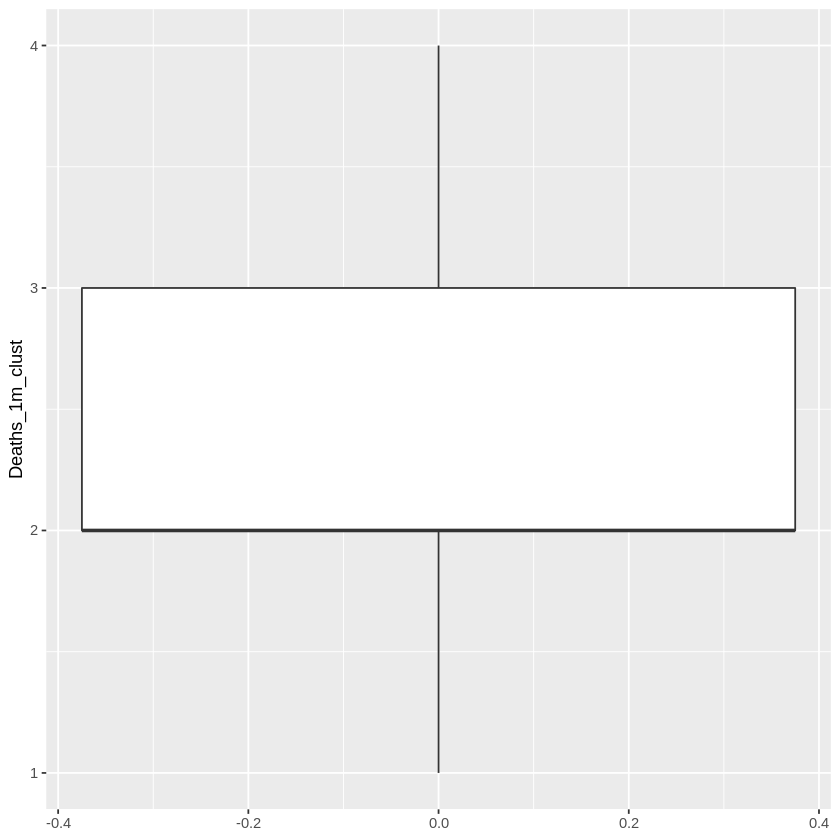

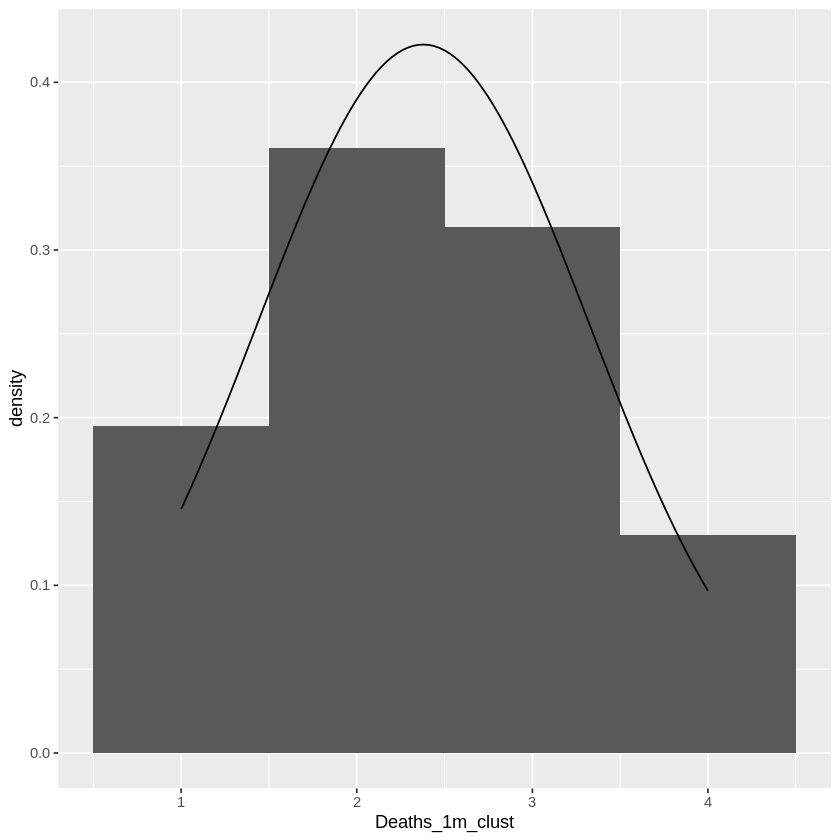

In [0]:
# Dados los valores y el boxplot con escala log10, parece interesante 
# utilizar una escala logarítmica para clasificarlos: 
# los de 1 o menos muertes por millón, 1 y 10, 10 y 100 y más de 100
covidTrain$Deaths_1m_clust[covidTrain$Deaths_1m<=1] <- 1
covidTrain$Deaths_1m_clust[covidTrain$Deaths_1m>1 & covidTrain$Deaths_1m<=10] <- 2
covidTrain$Deaths_1m_clust[covidTrain$Deaths_1m>10 & covidTrain$Deaths_1m<=100]  <- 3
covidTrain$Deaths_1m_clust[covidTrain$Deaths_1m>100] <- 4
ggplot(data=covidTrain, aes(y=Deaths_1m_clust)) + geom_boxplot()
ggplot(data=covidTrain, aes(x=Deaths_1m_clust)) + geom_histogram(aes(y=stat(density)),bins=4) +
stat_function(fun = dnorm, args = list(mean = mean(covidTrain$Deaths_1m_clust), sd = sd(covidTrain$Deaths_1m_clust)))

Al clasificar los muertos/millón en cuatro grupos a escala exponencial 10, parece que se obtiene una distribución cercana a la normal. Esto puede ser útil más adelante si utilizamos un algoritmo de clasificación.

### Identificación y tratamiento de valores extremos

Rango outliers: [ 1035.6 , 1035.6 ]

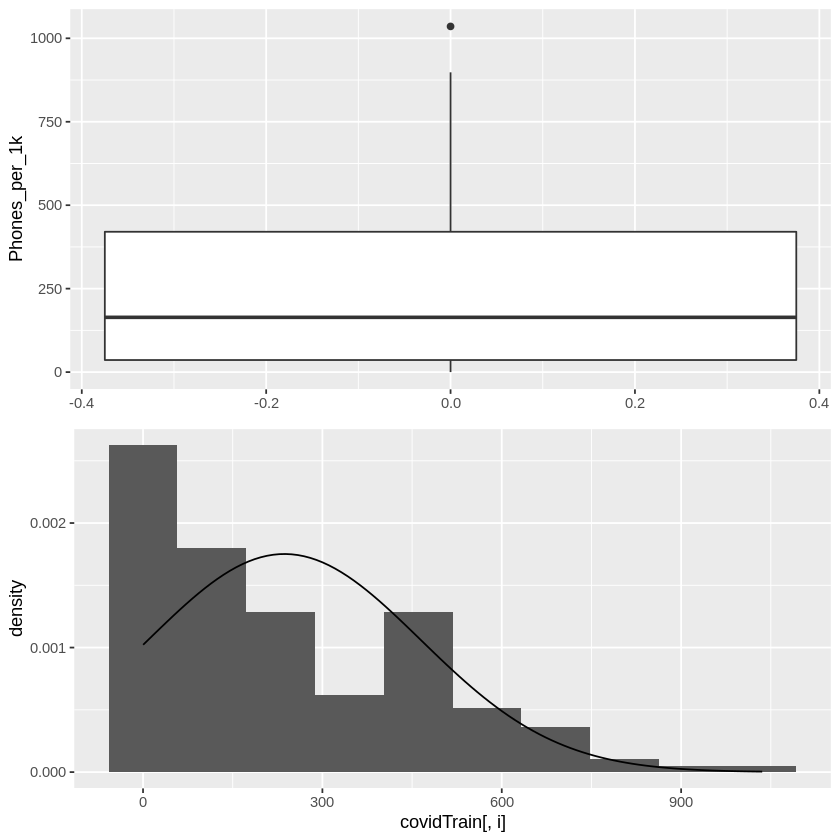

Rango outliers: [ 55100 , 55100 ]

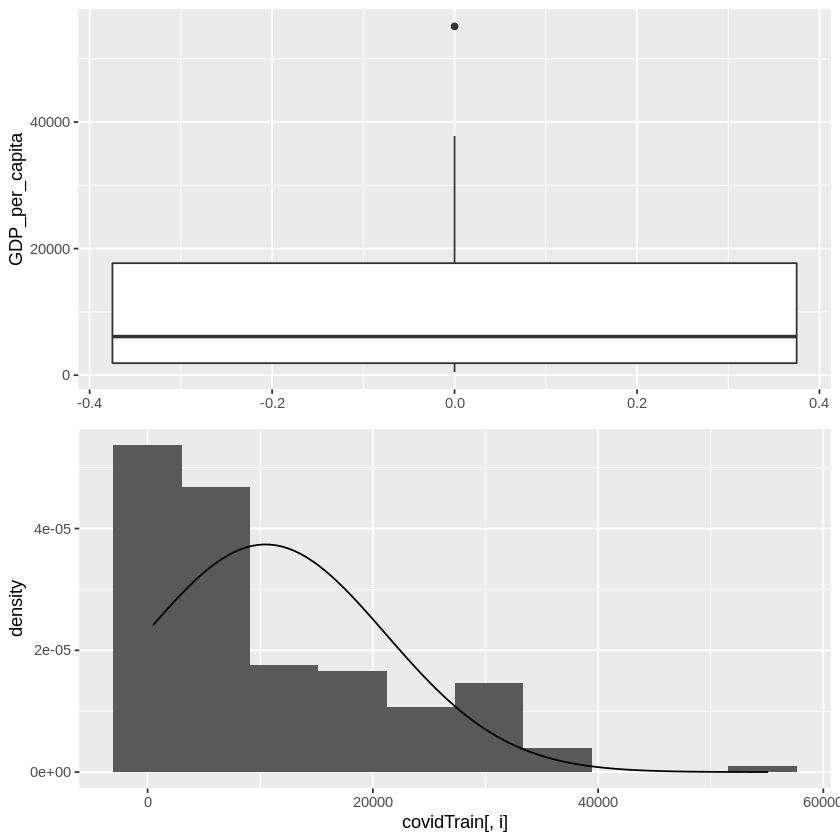

Rango outliers: [ 1648000 , 17075200 ]

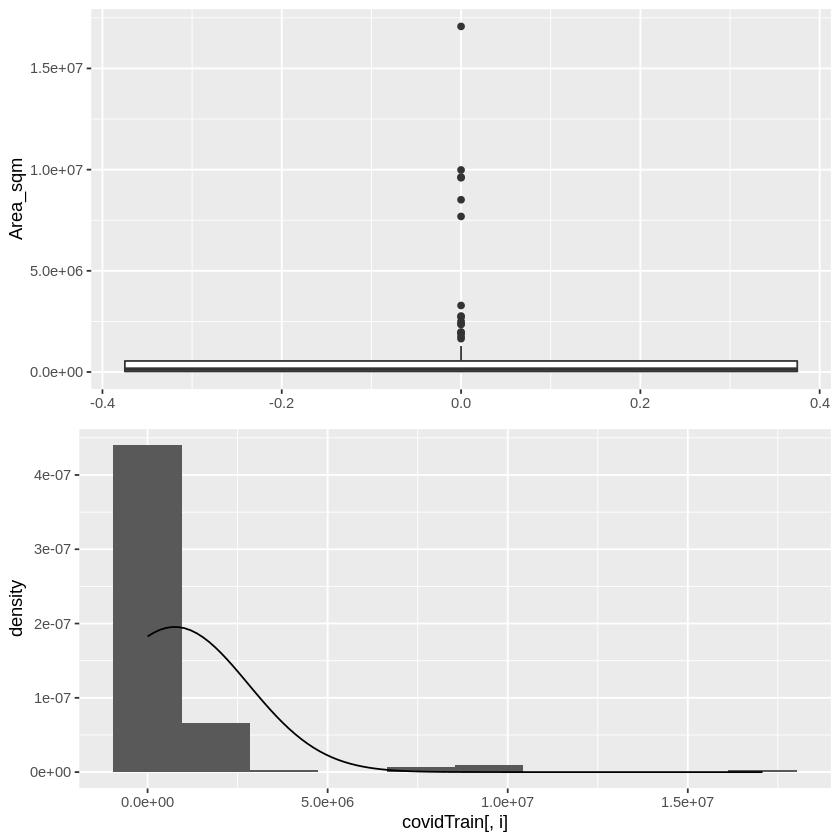

Rango outliers: [ 195.6 , 195.6 ]

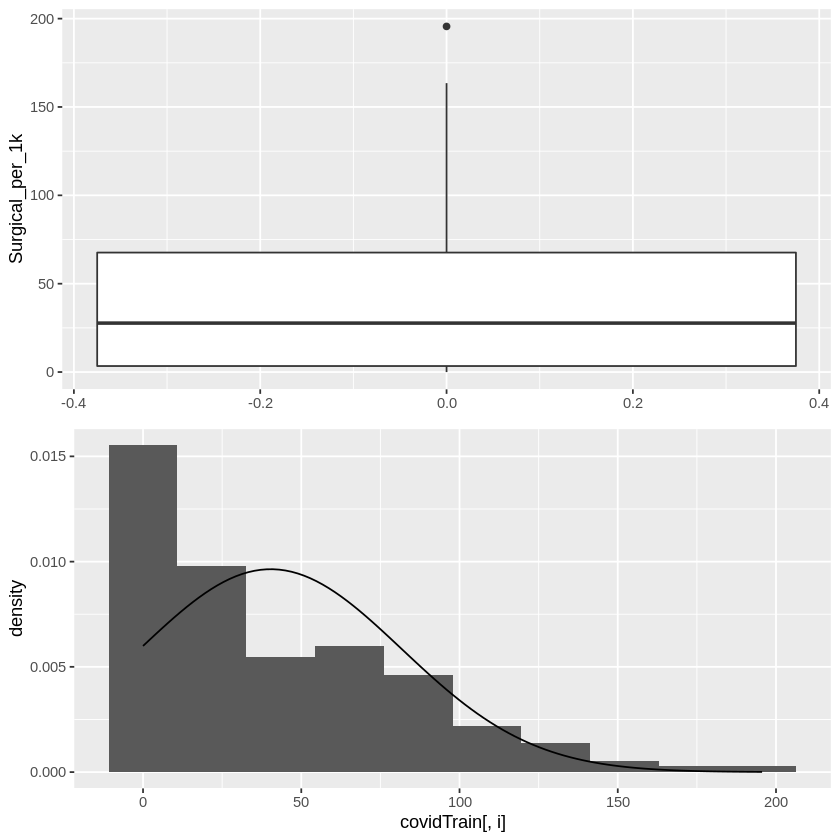

Rango outliers: [ 14.7 , 20.3 ]

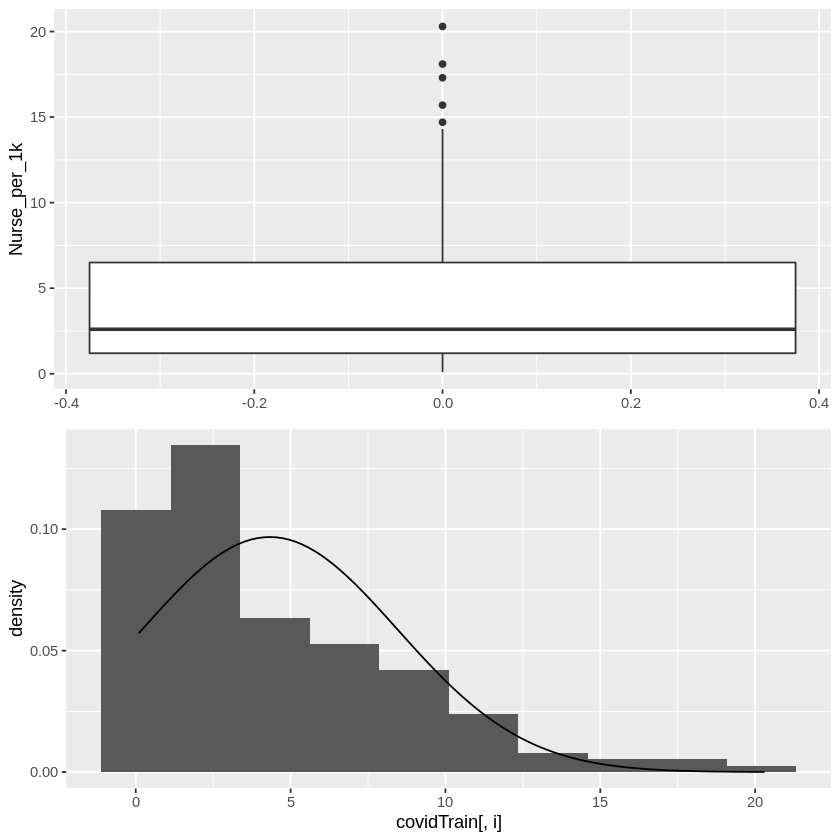

Rango outliers: [ 5093 , 9869.7 ]

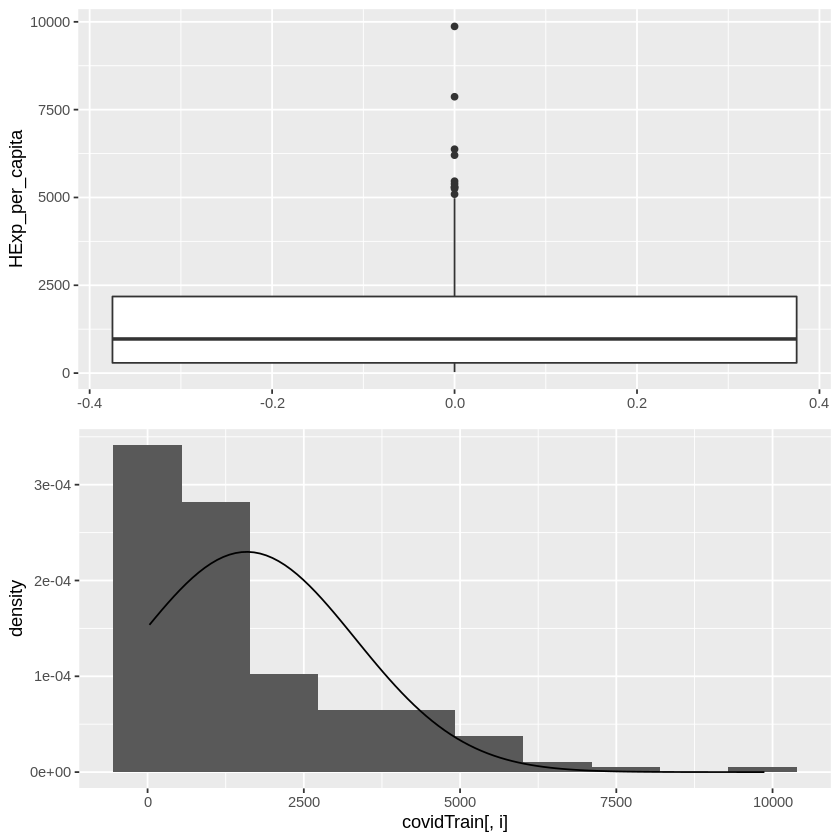

In [0]:
# Vamos a observar el resto de variables
# todas responden mejor a una escala log10
for (i in c("Phones_per_1k", "GDP_per_capita", "Area_sqm", 
"Surgical_per_1k", "Nurse_per_1k", "HExp_per_capita")) {
  grid.arrange(
    ggplot(data=covidTrain, aes(y=covidTrain[,i])) + geom_boxplot() + labs(y=i),
    ggplot(data=covidTrain, aes(x=covidTrain[,i])) + geom_histogram(aes(y=stat(density)),bins=10) +
    stat_function(fun = dnorm, args = list(mean = mean(covidTrain[,i]), sd = sd(covidTrain[,i]))),
  nrow = 2)
  outliers <- (boxplot.stats(covidTrain[,i])$out)
  cat("Rango outliers: [", min(outliers),",",max(outliers),"]")
  }

Al mostrar la curva normal sobre los histogramas, la muestra no parece obedecer a una distribución normal para ninguna de las variables. No obstante, al disponer de más de 30 muestras (n>30), se puede asumir la normalidad y utilizar el *t-test* para realizar el contraste de hipótesis más adelante.
$$
t = \frac{\overline{x} - \mu_0}{\frac{s}{\sqrt{n}}} 
$$

Además, los valores extremos no se corresponden con errores, por lo que los conservaremos. Si decidimos discretizar los valores continuos, podremos agrupar esos valores extremos en el primer o último grupo según sean extremos inferiores o superiores.

# 4. Análisis de los datos

## 4.1. Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar)

La selección se llevó a cabo en el apartado 3.1. aprovechando para sólo limpiar aquellos que ibamos a conservar.

Se trata de un subconjunto interesante, ya que contiene información de los dos ficheros de datos que hemos utilizado para intentar determinar la incidencia del Covid-19: 

* Atributos informativos:
  * "Country"
  * "Region"

* Atributos económicos: 
  * Phones_per_1k
  * GDP_per_capita

* Atributos sanitarios:
  * Surgical_per_1k
  * Nurse_per_1k
  * HExp_per_capita

* Otros:
  * Area_sqm 

## 4.2. Comprobación de normalidad y homogeneidad de la varianza

Para comprobación de la normalidad podemos utilizar el test Shapiro–Wilk

Para la comprobación de la homocedasticidad podemos utilizar el test de Levene

#### Test Shapiro–Wilk
Vamos a definir el contraste de hipótesis siguiente:
* $H_0$: los datos proceden de una distribución normal
* $H_1$: los datos no proceden de una distribución normal

In [0]:
# Test Shapiro-Wilk
for (i in c("Phones_per_1k", "GDP_per_capita", "Area_sqm", 
"Surgical_per_1k", "Nurse_per_1k", "HExp_per_capita", "Deaths_1m")) {
  s_p <- shapiro.test(covidTrain[,i])$p.value
  cat("Valor p de",i,"=", s_p,"\n")
}

Valor p de Phones_per_1k = 3.420185e-10 
Valor p de GDP_per_capita = 1.371521e-12 
Valor p de Area_sqm = 6.241369e-24 
Valor p de Surgical_per_1k = 5.322417e-11 
Valor p de Nurse_per_1k = 1.216621e-11 
Valor p de HExp_per_capita = 9.287807e-14 
Valor p de Deaths_1m = 5.24587e-23 


El valor $p$ es inferior a 0.05, por lo que podemos rechazar la hipótesis nula, es decir: las muestras no siguen una distribución normal.


### Test de Levene
Vamos a definir el contraste de hipótesis siguiente:
* $H_0$: la varianza entre los grupos de muertes por Covid-19 es igual
* $H_1$: la varianza entre los grupos es distinta



In [0]:
# Convertimos a Factor la clusterizacion de muertes
covidTrain$Deaths_1m_clust <- as.factor(covidTrain$Deaths_1m_clust)
# Test de Levene
library(car)
for (i in c("Phones_per_1k", "GDP_per_capita", "Area_sqm", 
"Surgical_per_1k", "Nurse_per_1k", "HExp_per_capita")) {
  l_p <- leveneTest(covidTrain[,i] ~ Deaths_1m_clust, data = covidTrain)$`Pr(>F)`
  cat("Valor p de",i,"=", l_p,"\n")
}

Valor p de Phones_per_1k = 0.00341181 NA 
Valor p de GDP_per_capita = 0.00534714 NA 
Valor p de Area_sqm = 0.2788607 NA 
Valor p de Surgical_per_1k = 2.037095e-05 NA 
Valor p de Nurse_per_1k = 0.0004787935 NA 
Valor p de HExp_per_capita = 3.828648e-06 NA 


Con $p>0.05$ la hipótesis nula $H_0$ sólo se cumple para *Area_sqm*, por lo que podemos decir que la varianza de la superficie de los países en función de las muertes por Covid-19 es la misma.

No sucede lo mismo con las otras variables, por lo que en este caso rechazamos la hipótesis nula.


## 4.3. Aplicación de pruebas estadísticas para comparar los grupos de datos. En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc. Aplicar al menos tres métodos de análisis diferentes.


### Contraste de hipótesis

Vamos a ejecutar el test de Kruskal-Wallis para determinar si existen diferencias en el número de muertes (agrupadas anteriormente en 0-1, 2-10, 11-100, 101- / millón de habitantes) según el resto de variables. 

In [0]:
# Ejecución del test de Kruskal-Wallis
for (i in c("Phones_per_1k", "GDP_per_capita", "Area_sqm", 
"Surgical_per_1k", "Nurse_per_1k", "HExp_per_capita")) {
  k_p <- kruskal.test(covidTrain[,i] ~ Deaths_1m_clust, data = covidTrain)$p.value
  cat("Valor p de",i,"=", k_p,"\n")
}

Valor p de Phones_per_1k = 1.441227e-17 
Valor p de GDP_per_capita = 1.15233e-15 
Valor p de Area_sqm = 0.02185701 
Valor p de Surgical_per_1k = 7.254682e-17 
Valor p de Nurse_per_1k = 1.015436e-10 
Valor p de HExp_per_capita = 1.099294e-16 


La hipótesis nula $H_0$ es que no existen diferencias en el número de muertes/millón de habitantes según cada una de las variables, es decir, que las cuatro poblaciones de datos en función de las muertes son iguales. La hipótesis alternativa $H_1$ es que al menos una de las poblaciones es distinta:
* $H_0: \mu_1=\mu_2=\mu_3=\mu_4$
* $H_1: \exists\mu_j\not=\mu\ \ \ \ j=1,2,3,4$

Al ejecutar el test de Kruskal-Wallis, el valor p obtenido es prácticamente 0 para todas las variables excepto para *Areq_sqm* con $p=0.02186$. 

En cualquier caso, tomando el valor habitual $\alpha=0,05$, se rechazaría la hipótesis nula para todas las variables, por lo que podemos afirmar que al menos una de las cuatro poblaciones (en función del número de muertes por Covid-19) es distinta a las demás.



### Análisis de regresión:

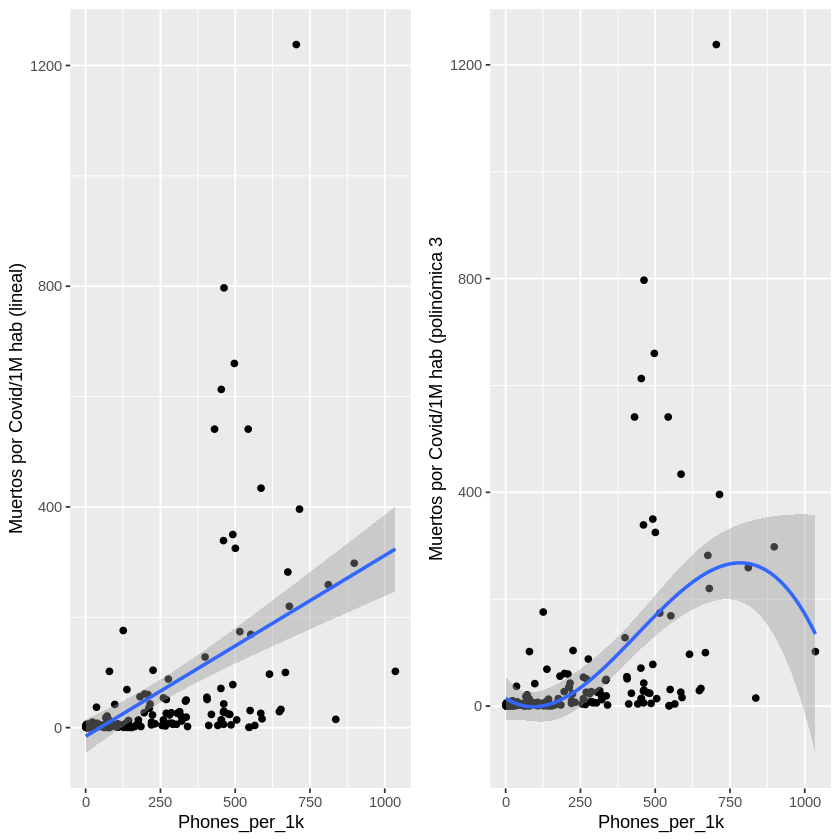

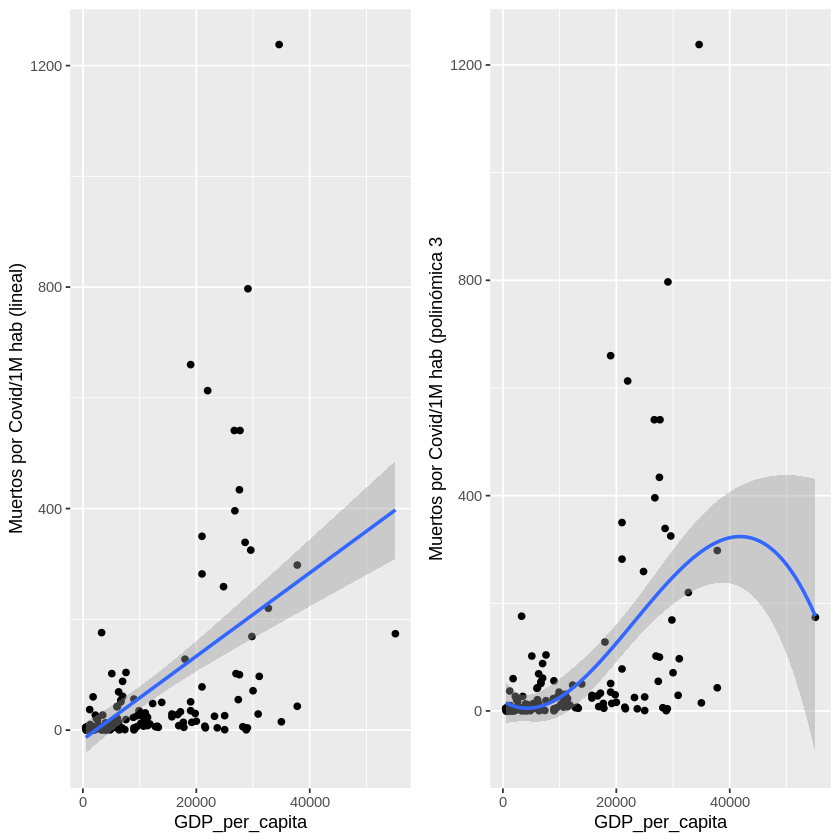

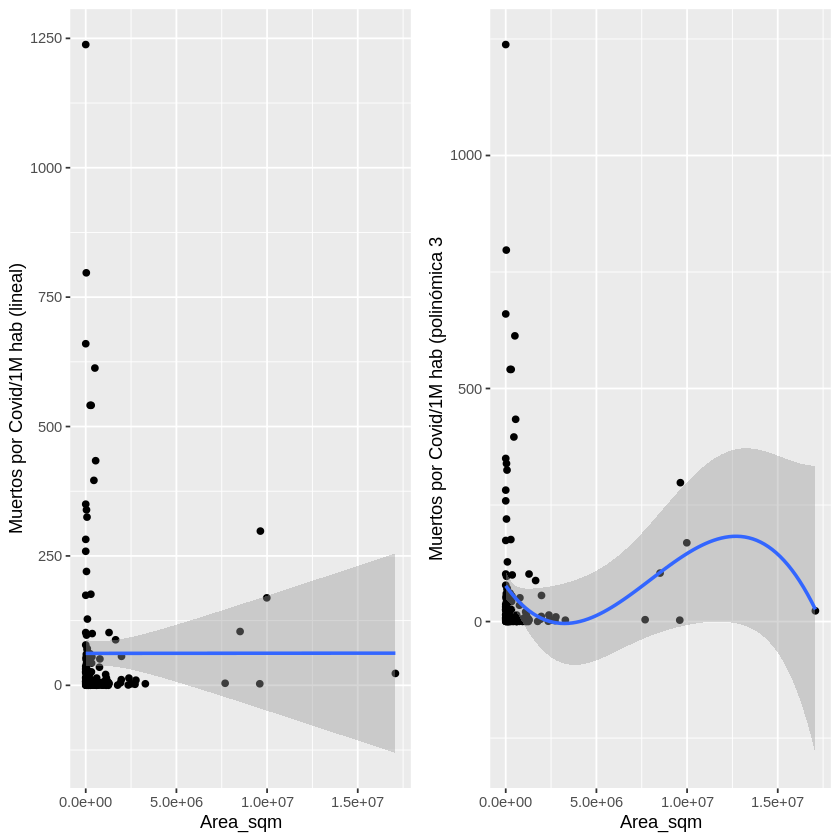

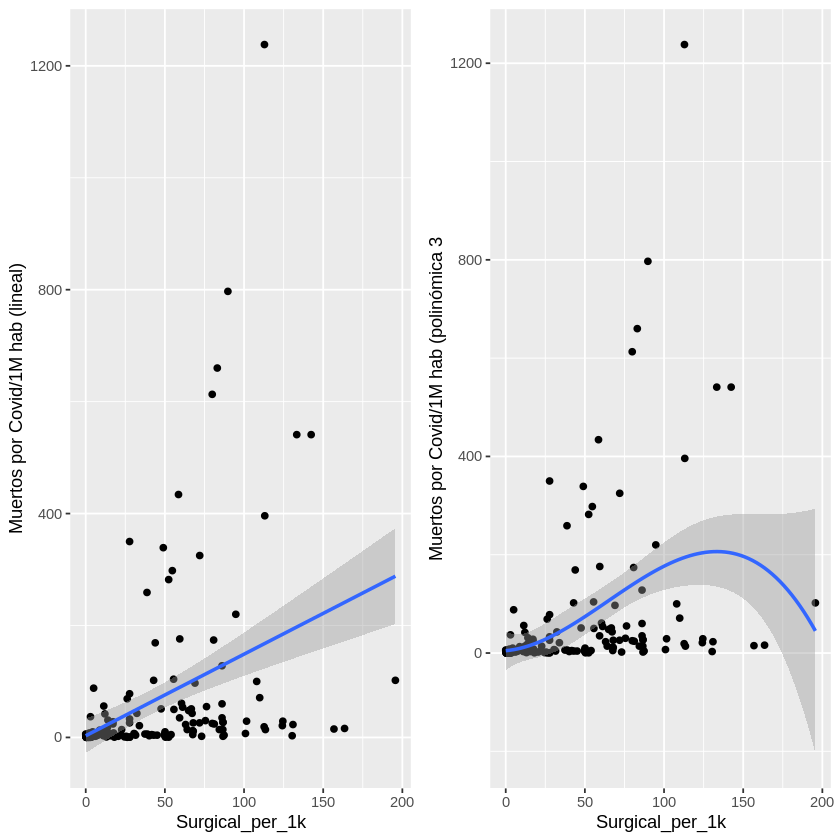

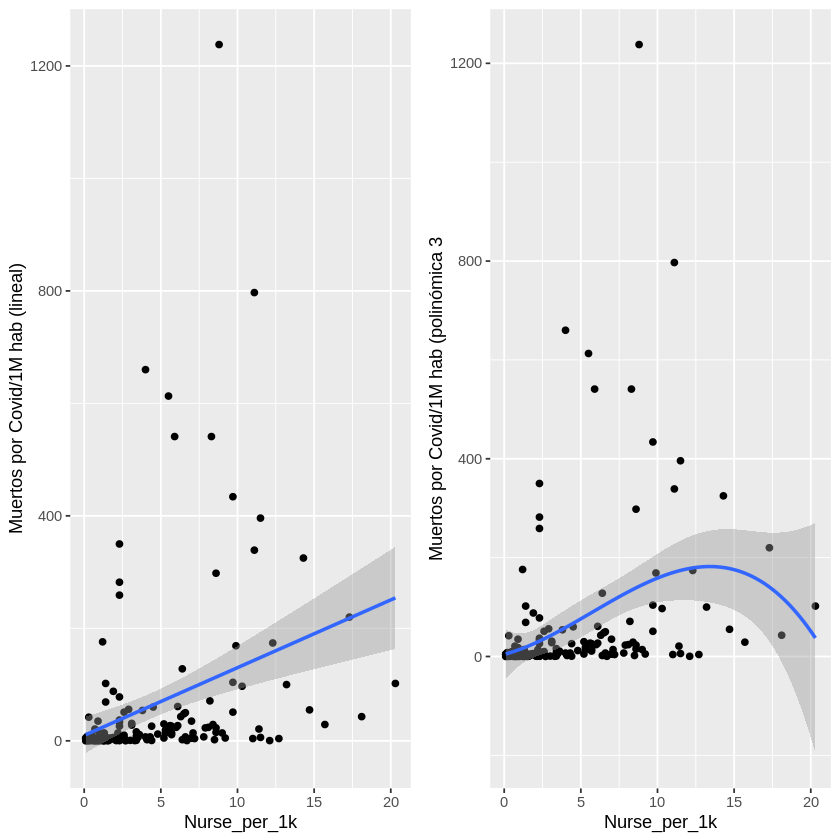

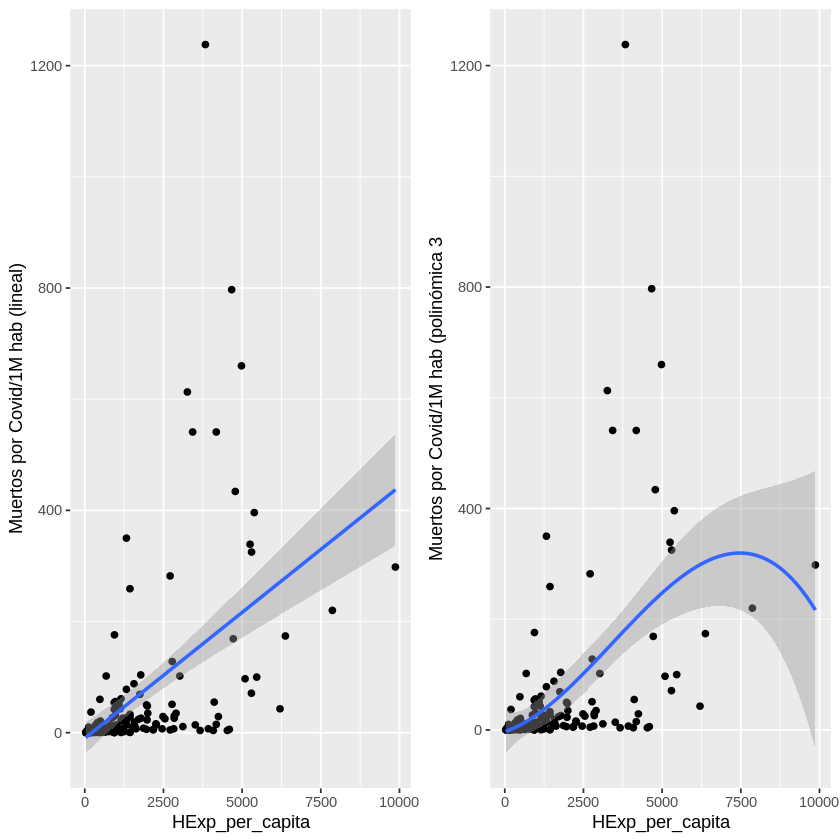

In [0]:
for (i in c("Phones_per_1k", "GDP_per_capita", "Area_sqm", 
"Surgical_per_1k", "Nurse_per_1k", "HExp_per_capita")) {
  grid.arrange(
    (ggplot(covidTrain, aes(y=Deaths_1m, x=covidTrain[,i])) +
    xlab(i)+ylab("Muertos por Covid/1M hab (lineal)") +
    geom_point() + stat_smooth(method = "lm",  formula = y ~ poly(x, 1))),
    (ggplot(covidTrain, aes(y=Deaths_1m, x=covidTrain[,i])) +
    xlab(i)+ylab("Muertos por Covid/1M hab (polinómica 3)") +
    geom_point() + stat_smooth(method = "lm",  formula = y ~ poly(x, 3))),
    ncol=2)
}

Al mostrar la línea de regresión, se puede deducir que el número de muertes por Covid-19 está directamente relacionado con el nivel de desarrollo económico y sanitario y que no parece tener relación con la superficie del país.

Al utilizar una curva polinómica 3, la relación se invierte a partir de un nivel determinado de desarrollo.

Una posible explicación, en base a las variables disponibles, es el hecho de que se estén realizando menos pruebas en los paises menos desarrollados.

### Análisis de correlación:

Warning message in ggcorr(covidTrain, nbreaks = 4, label = TRUE, label_size = 5, :
“data in column(s) 'Country', 'Region' are not numeric and were ignored”


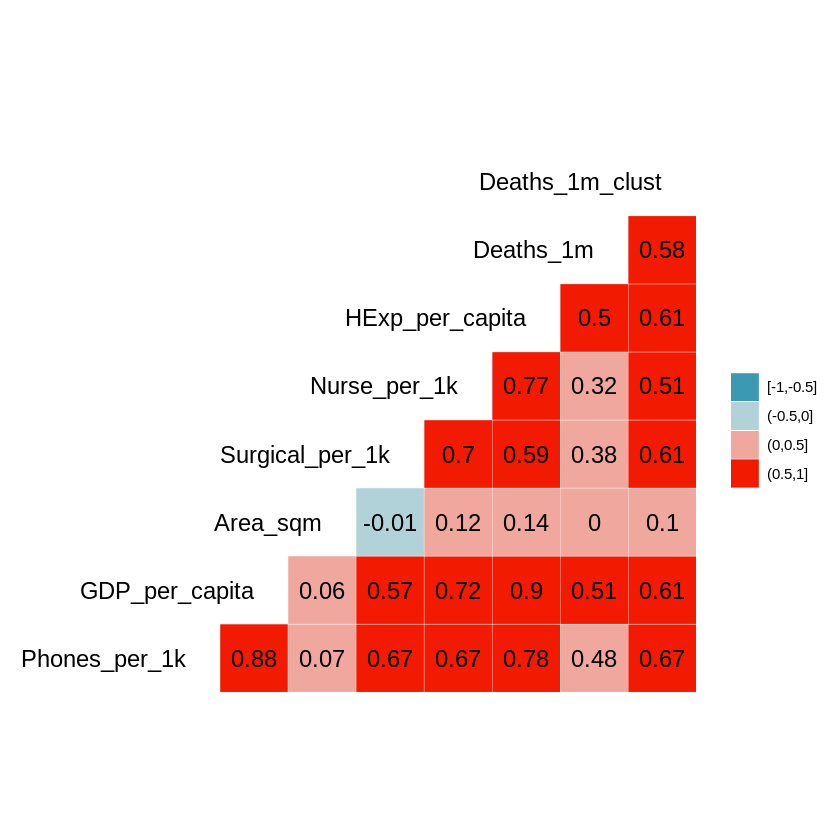

In [0]:
ggcorr(covidTrain, nbreaks=4, label=TRUE, label_size=5, layout.exp=2, hjust=1, label_round=2, size=5)

El análisis de correlaciones confirma lo indicado por las rectas y curvas de regresión: existe una relación directa entre el número de muertes y los índices de desarrollo.
